# Day 12 - Hypothesis Tests

## Importing Libraries

In [34]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
import warnings
warnings.simplefilter("ignore")

In [20]:
## Load Dataset
boat = sns.load_dataset('Titanic')
boat.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
boat.shape

(891, 15)

In [22]:
## Checking null values
boat.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [23]:
## Dropping na values of Age
boat.dropna(subset=['age'], axis=0, inplace=True)
boat.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [26]:
# Getting age, sex and fare
df = boat[['sex','age','fare']]
df.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


##  T Test 
Applying T Test to compare age of Males and Females

In [39]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
# Dividing data in to male and female subgroups
df_male = df[df['sex']=='male'] 
df_female = df[df['sex']=='female']

stat, p = ttest_ind(df_male['age'], df_female['age'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('There is no Significant difference')
else:
  print('There is a Significant difference')


stat=2.499, p=0.013
There is Significant difference


### 1 Sample T test

In [40]:
# Example of the 1 sample t-test
from scipy.stats import ttest_1samp
# Dividing data in to male and female subgroups
df_male = df[df['sex']=='male'] 
df_female = df[df['sex']=='female']

stat, p = ttest_1samp(df_male['age'], 36) # Comparing with a known value
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('There is no Significant difference')
else:
  print('There is a Significant difference')


stat=-7.647, p=0.000
There is a Significant difference


## Shapiro Wilk Test 

## Tests whether a data sample has a Gaussian Distribution
### Assumptions
1. Observations in each smple are independent and ideally Distributed
2. Interpretation

H0 : Sample has Gaussian Distribution.

H1 : Sample doesnt hav Gaussian Distribution

<AxesSubplot:>

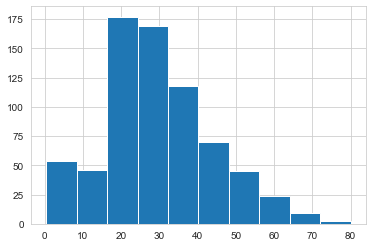

In [42]:
sns.set_style("whitegrid")
df['age'].hist()

<AxesSubplot:xlabel='age'>

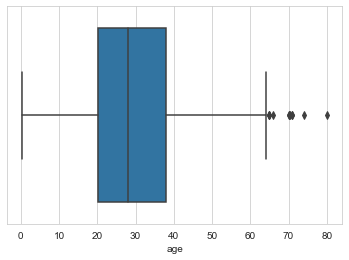

In [43]:
sns.boxplot(df['age'])

## Normality test on Age

In [46]:
from scipy.stats import shapiro
data = df['age']
stat,p = shapiro(data)
print('stat', stat)
print('p', p)
if p>0.05:
    print('data is Normally Distributed')
else:
    print('Data is not Normally Distributed')

stat 0.9814548492431641
p 7.322165629375377e-08
data is not Normally Distributed
